# Répartition de particules entre deux compartiments

Comme vu en cours et en travaux dirigés, nous considérons ici un nombre $N_\mathrm{particules}$ de particules réparties entre deux compartiments identiques, dénomés "Gauche" et "Droite".

Nous allons alors nous intéresser à la probabilité $p(n)=P(N_\mathrm{gauche}=n)$ de trouver $n$ particules dans le compartiment de gauche.

## Modules nécessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [2]:
import tools.gauchedroite as gd

## Prise en main

Nous avons créé une fonction 

    $ nouveautirage(Nparticules=10,Verbose=False)
    
qui effectue une répartion aléatoire de Nparticules entre les deux compartiments. La valeur de Nparticules par défaut est 10.

Si Verbose == False, alors la sortie de nouveautirage est un [dictionnaire python](https://courspython.com/dictionnaire.html) donnant le nombre de particules dans chaque compartiment. Par exemple:
    
    {'Gauche': 5, 'Droite': 5})
 
Si Verbose == True et si Nparticules <= 100 , la sortie est un tuple comprenant une liste indiquant pour chaque particule le compartiment dans laquelle elle se trouve et le dictionnaire ci-dessous. Par exemple:

    $ nouveautirage(10,True)
    (['Gauche',
      'Droite',
      'Gauche',
      'Gauche',
      'Droite',
      'Droite',
      'Droite',
      'Gauche',
      'Gauche',
      'Droite'],
     {'Gauche': 5, 'Droite': 5})
    
Le résultat de nouveautirage peut facilement être représenté sous forme d'histogramme grâce à la fonction [pyplot.bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) de [matplotlib](https://matplotlib.org/).

In [3]:
gd.nouveautirage(10,True)

(['Gauche',
  'Droite',
  'Gauche',
  'Gauche',
  'Gauche',
  'Droite',
  'Gauche',
  'Gauche',
  'Droite',
  'Gauche'],
 {'Gauche': 7, 'Droite': 3})

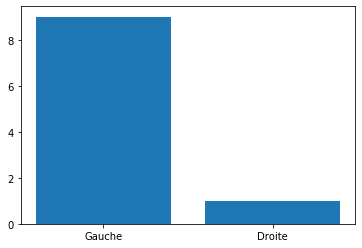

In [4]:
a=gd.nouveautirage(10)
plt.bar(a.keys(),a.values())
plt.show()

### A faire

Faites 10 tirages avec 10 particules et construisez sur votre cahier un histogramme du nombre de fois où une 
valeur $n$ de particules est obtenu.

## Probabilité de trouver $n$ particules dans le compartiment de gauche

Pour un nombre Nparticules de particules, nous allons effectuer Ntirages et construire un histogramme du nombre de fois où un nombre $n$ est trouvé dans ces tirages

In [31]:
# définition de Nparticules et Ntirages

Nparticules=100
Ntirages=10000

In [32]:
# on effectue Ntirage et on garde dans une liste pour chaque tirage le nombre de particules à gauche

NombresGauche=np.array([gd.nouveautirage(Nparticules).get("Gauche") for i in range(Ntirages)])
NombresGauche[0:100]

array([44, 58, 49, 49, 50, 48, 44, 49, 54, 53, 48, 50, 55, 52, 44, 50, 50,
       52, 46, 42, 55, 50, 48, 48, 43, 53, 51, 41, 46, 49, 52, 49, 49, 42,
       49, 50, 55, 52, 62, 49, 51, 48, 38, 45, 52, 47, 55, 51, 46, 50, 44,
       52, 53, 54, 51, 51, 46, 48, 57, 48, 45, 57, 52, 48, 59, 47, 40, 57,
       56, 60, 57, 44, 50, 45, 54, 41, 44, 56, 58, 37, 59, 58, 47, 55, 57,
       52, 52, 46, 47, 47, 41, 45, 54, 54, 47, 52, 53, 53, 50, 50])

In [33]:
# construction de l'histogramme
(distribution,n)=np.histogram(NombresGauche,bins=range(Nparticules+1))

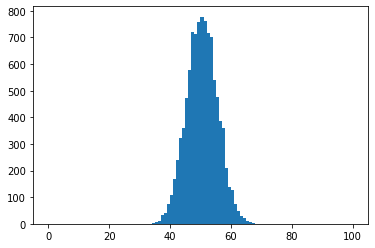

In [34]:
# représentation graphique
plt.hist(NombresGauche,bins=range(Nparticules+1))
plt.show()

## Expression analytique de $p(n)$

En travaux dirigés, vous avez démontrer que pour $N$ particules la distribution $p(n)$ soit donnée par la [loi binomiale](https://fr.wikipedia.org/wiki/Loi_binomiale):

\begin{equation*}
p(n)=\frac{1}{2^N}\binom{N}{n}.
\end{equation*}

On peut alors s'attendre à trouver $N_\mathrm{tirages}\times p(n)$ fois $n$ particules à gauche pour $N_\mathrm{tirages}$ tirages.

On peut comparer cette expression au résultat que nous avons obtenu par tirages aléatoires.

In [35]:
def p(n,Nparticules=10):
    p=sp.binom(Nparticules,n)*1./2.**Nparticules
    return p

Comparaison entre l'expression analytique et le résultat numérique

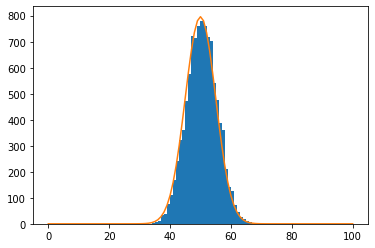

In [36]:
plt.hist(NombresGauche,bins=range(Nparticules+1))
n=np.arange(0,Nparticules+1)
plt.plot(n,p(n,Nparticules)*Ntirages)
#plt.yscale("log")
plt.show()

### A faire

Jouer avec Nparticules et Ntirages pour observer l'évolution de la distribution de $n$.

## Approximation gaussienne de la distribution $p(n)$

En cours, nous avons écrite que la distribution binomiale ci-dessus peut être approximée pour $N$ grand par

\begin{equation*}
p(n)\approx p_\mathrm{Gauss}(n)=\sqrt{\frac{2}{N\pi}}\exp \left(-\frac{2}{N}\left(n-\frac{N}{2}\right)^2 \right),
\end{equation*}

c'est-à-dire une distribution Gaussienne, ou [loi normale](https://fr.wikipedia.org/wiki/Loi_normale), centrée en $\frac{N}{2}$ et de [variance](https://fr.wikipedia.org/wiki/Variance_(math%C3%A9matiques)) $\sigma^2=\frac{N}{4}$.

Nous allons comparer cette distribution Gaussienne à la distribution binomiale théorique et à la distribution obtenue numériquement.

In [37]:
def pGauss(n,Nparticules=10):
    p=np.sqrt(2./(np.pi*Nparticules))*np.exp(-2./Nparticules*(n-Nparticules/2.)**2)
    return p

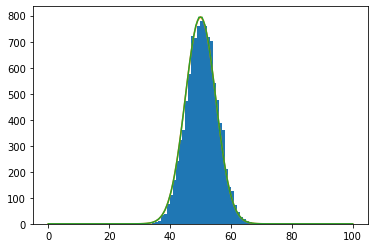

In [39]:
plt.hist(NombresGauche,bins=range(Nparticules+1))
n=np.arange(0,Nparticules+1)
plt.plot(n,p(n,Nparticules)*Ntirages)

n=np.linspace(0,Nparticules,100)
plt.plot(n,pGauss(n,Nparticules)*Ntirages)

#plt.yscale("log")
plt.show()

### A faire
On peut voir que pour $N_\mathrm{Particules}=100$, ces distributions sont très similaires. Faire varier $N_\mathrm{Particules}$ pour voir comment cela change pour des valeurs plus faibles ou des valeurs plus grandes.

## Estimation de l'erreur par rapport à la moyenne: écart typ

En TD, nous avons estimé la largeur de la distribution grâce à la [largeur à mi-hauteur](https://fr.wikipedia.org/wiki/Largeur_%C3%A0_mi-hauteur), dénotée $H_N$ dans le TD. C'est une façon simple d'estimer la largeur d'une distribution graphiquement, mais on préfèrera ici estimer la largeur de la distribution par son [écart type](https://fr.wikipedia.org/wiki/%C3%89cart_type), $\sigma$, défini par

\begin{equation*}
\sigma^2=\int p(n) (n-\bar{n})^2\, dn,
\end{equation*}

où $\bar{n}=\int p(n) n \,dn$ est la moyenne de $n$. On peut voir que $\sigma^2$, appelé [variance](https://fr.wikipedia.org/wiki/Variance_(math%C3%A9matiques)) de la distribution, est équivalent à l'[erreur quadratique moyenne](https://fr.wikipedia.org/wiki/Erreur_quadratique_moyenne): c'est la moyenne de la distance $(n-\bar{n})^2$ à la moyenne.

Pour le cas d'une distribution gaussienne, il y a une relation simple entre l'écart type et la largeur à mi-hauteur:

\begin{equation*}
H_N=2\sqrt{2\ln 2}\sigma \approx 2,35 \sigma.
\end{equation*}

Nous allons estimer la moyenne et l'écart type de la distribution de $p(n)$ à partir des tirages aléatoires par
\begin{eqnarray*}
    \bar{n}&=\frac{1}{N_\mathrm{tirages}}\sum_{i=1}^{N_\mathrm{tirages}} n_i \\
    \sigma^2&=\frac{1}{N_\mathrm{tirages}}\sum_{i=1}^{N_\mathrm{tirages}} (n_i-\bar{n})^2, 
\end{eqnarray*}
où $n_i$ est le nombre de particules à gauche dans le $i^\mathrm{ème}$ tirage. Ceci est fait simplement grâce aux fonctions du package [numpy](https://numpy.org/):

    numpy.mean()
    
et

    numpy.std()


In [ ]:
# définition de Nparticules et Ntirages

Nparticules=100
Ntirages=10000

In [42]:
# on effectue Ntirage et on garde dans une liste pour chaque tirage le nombre de particules à gauche

NombresGauche=np.array([gd.nouveautirage(Nparticules).get("Gauche") for i in range(Ntirages)])
NombresGauche[0:100]

array([50, 50, 58, 44, 47, 53, 46, 42, 45, 51, 42, 50, 43, 55, 45, 52, 48,
       52, 46, 44, 58, 49, 58, 52, 46, 46, 52, 51, 47, 52, 52, 49, 48, 41,
       48, 51, 50, 59, 55, 51, 54, 62, 51, 51, 46, 52, 53, 48, 48, 51, 53,
       48, 49, 42, 56, 45, 52, 56, 47, 51, 48, 43, 51, 50, 55, 50, 57, 48,
       55, 57, 46, 58, 42, 54, 54, 56, 51, 55, 59, 51, 44, 51, 54, 60, 49,
       41, 52, 49, 48, 48, 44, 48, 51, 57, 44, 46, 44, 49, 52, 58])

In [48]:
# calcul de la moyenne et de l'écart type

nmoyen=np.mean(NombresGauche)
sigma=np.std(NombresGauche)
print('''
Pour {} particules et après {} tirages, le nombre moyen de particules à gauche est
   nmoyen = {}
avec un écart type
   sigma = {}'''.format(Nparticules,Ntirages, nmoyen, sigma)
     )


Pour 100 particules et après 10000 tirages, le nombre moyen de particules à gauche est
   nmoyen = 49.9944
avec un écart type
   sigma = 4.969161764322027


Pour la distribution gaussienne discutée ci-dessus, l'écart type est donc $\sigma=\sqrt{\frac{N}{4}}$. La moyenne attendue est bien-sûr $N/2$ pour deux compartiments identiques (voir TD).

In [49]:
# moyenne et écart type pour la distribution Gaussienne

sigmaGauss=np.sqrt(Nparticules/4.)
print('''
Pour {} particules, le nombre moyen de particules à gauche attendu est
   nmoyen = {}
avec un écart type
   sigma = {}'''.format(Nparticules, Nparticules/2, sigmaGauss)
     )


Pour 100 particules, le nombre moyen de particules à gauche attendu est
   nmoyen = 50.0
avec un écart type
   sigma = 5.0


### A faire

Estimer par des tirages aléatoires $\sigma$ pour différentes valeurs de $N_\mathrm{particules}$ et tracer $\sigma^2$ en fonction de $N_\mathrm{particules}$. Trouvez-vous une droite comme cela est attendu?